# US Cafe' Stores Sales Analysis

## Table of Contents

#### Importing libraries and data and renaming columns
#### The elbow technique
#### k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Create path
path = r'/Users/rusamijan/04-2023 US Stores Sales Analysis'

In [4]:
#Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'sales_cleaned.pkl'))

In [5]:
df.shape

(4248, 20)

In [6]:
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,2010-01-04,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2010-01-07,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,2010-01-11,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,2010-01-12,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2011-01-07,Coffee,Columbian,Regular


In [7]:
# Removing all categorical variables
df1=df.drop(['State', 'Market', 'Market Size','Date', 'Product Type', 'Product','Type'], axis = 1, inplace = True)

In [8]:
df.head()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
0,203,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2
1,203,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2
2,203,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2
3,203,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2
4,203,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2


In [9]:
df.shape

(4248, 13)

### The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2445101940.3975987,
 -1505963500.803367,
 -1099963224.4929614,
 -880845668.8667748,
 -703018709.3035765,
 -603915798.8890338,
 -515341560.30090207,
 -465331047.57411486,
 -424824032.3205352]

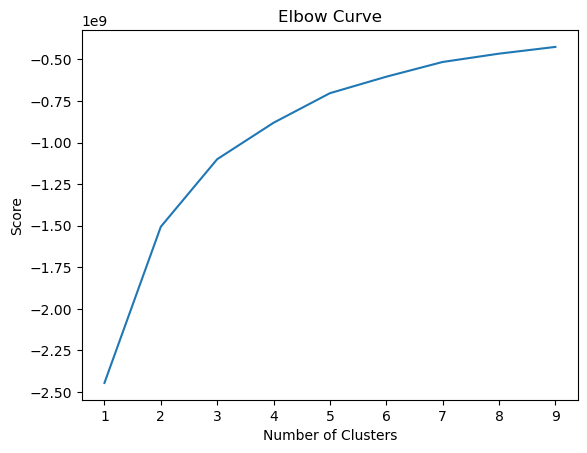

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [31]:
#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### k-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3,) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [15]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs

df['clusters'] = kmeans.fit_predict(df)

In [16]:
df.head()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,clusters
0,203,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,0
1,203,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,0
2,203,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,1
3,203,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,1
4,203,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,0


#export the clustering table for using in Tableau
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'adidas_4clustering.csv'))

In [17]:
# Verify if the clusters we correctly assigned with a general view
df['clusters'].value_counts()

0    3613
1     585
2      50
Name: clusters, dtype: int64

In [18]:
df.columns

Index(['Area Code', 'Profit', 'Margin', 'Sales', 'COGS', 'Total Expenses',
       'Marketing', 'Inventory', 'Budget Profit', 'Budget COGS',
       'Budget Margin', 'Budget Sales', 'ProductId', 'clusters'],
      dtype='object')

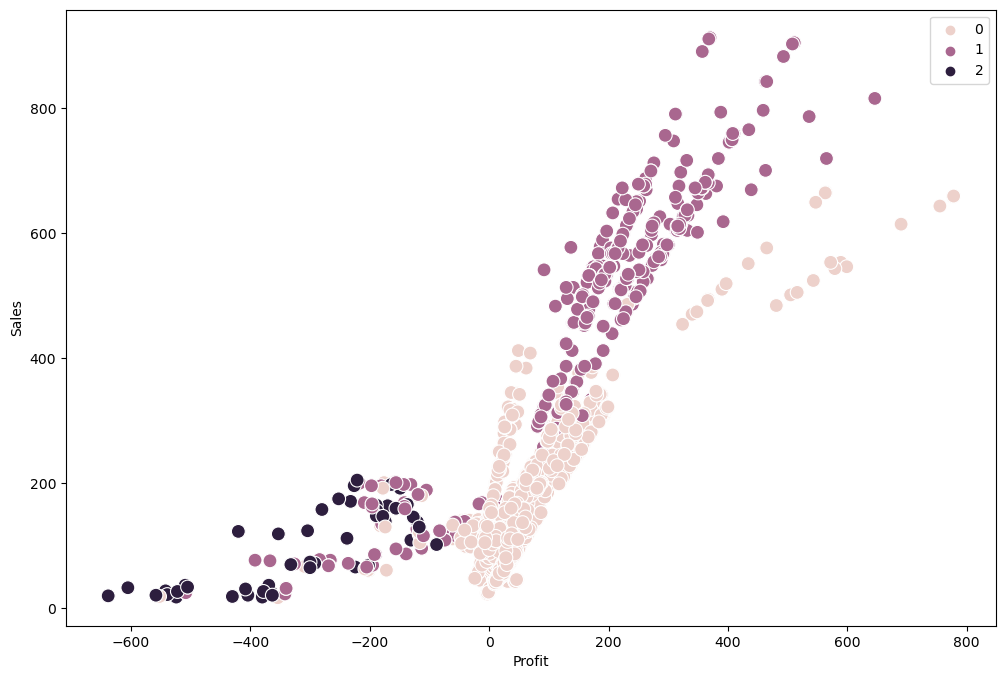

In [19]:
# Plot the clusters for the "Profit" and "Sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Profit'], y=df['Sales'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Profit') # Label x-axis.
plt.ylabel('Sales') # Label y-axis.
plt.show()

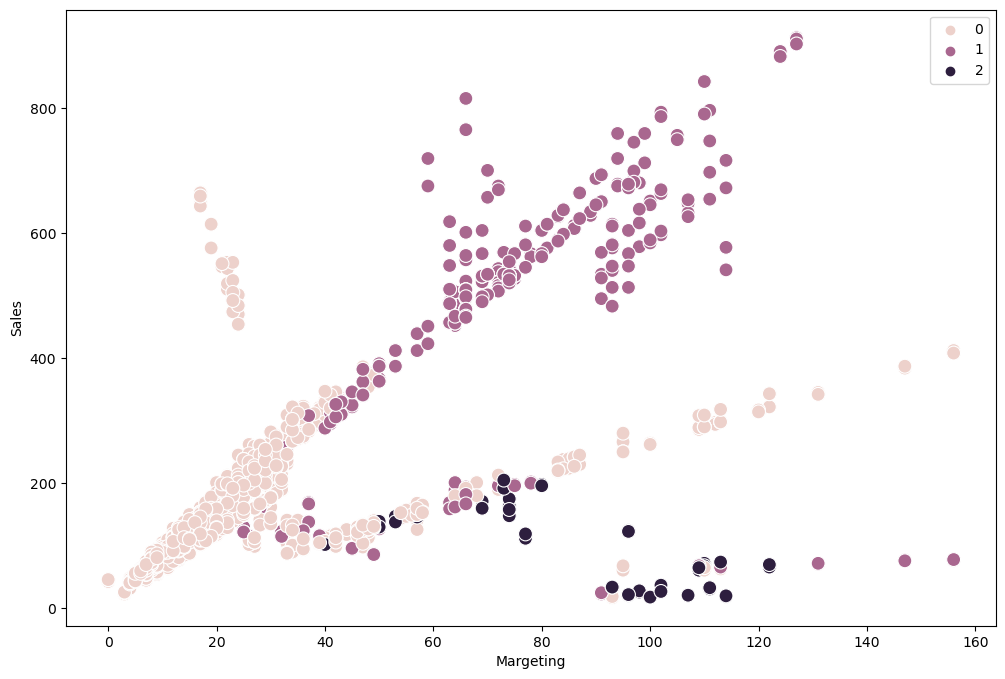

In [21]:
# Plot the clusters for the "Marketing" and "Sales" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Marketing'], y = df['Sales'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Margeting')
plt.ylabel('Sales')
plt.show()

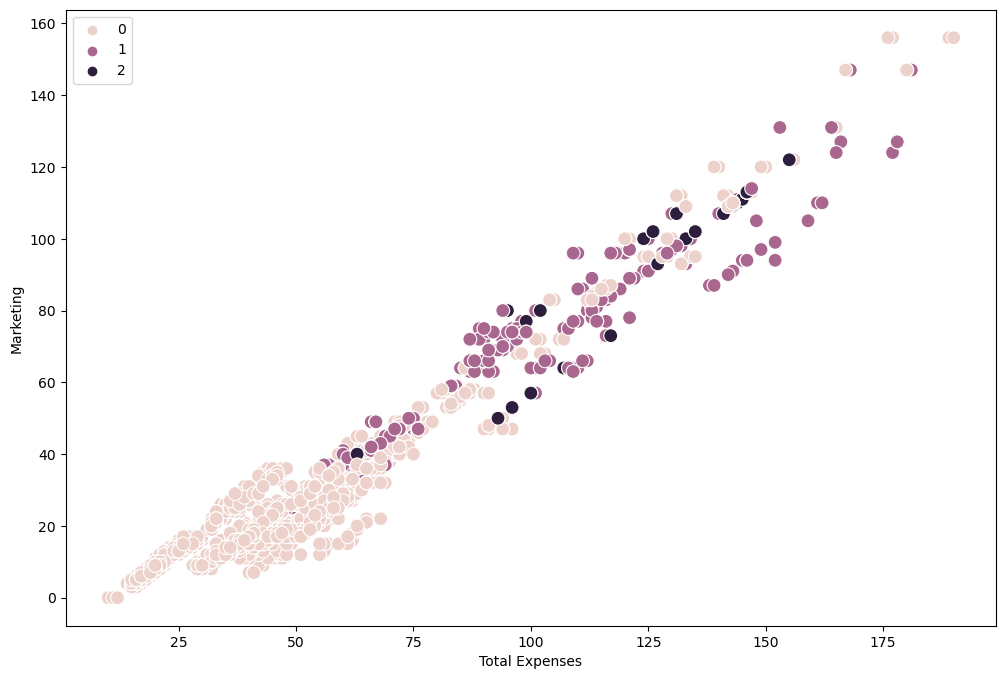

In [22]:
# Plot the clusters for the "Total Expenses" and "Marketing" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Total Expenses'], y = df['Marketing'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Total Expenses')
plt.ylabel('Marketing')
plt.show()

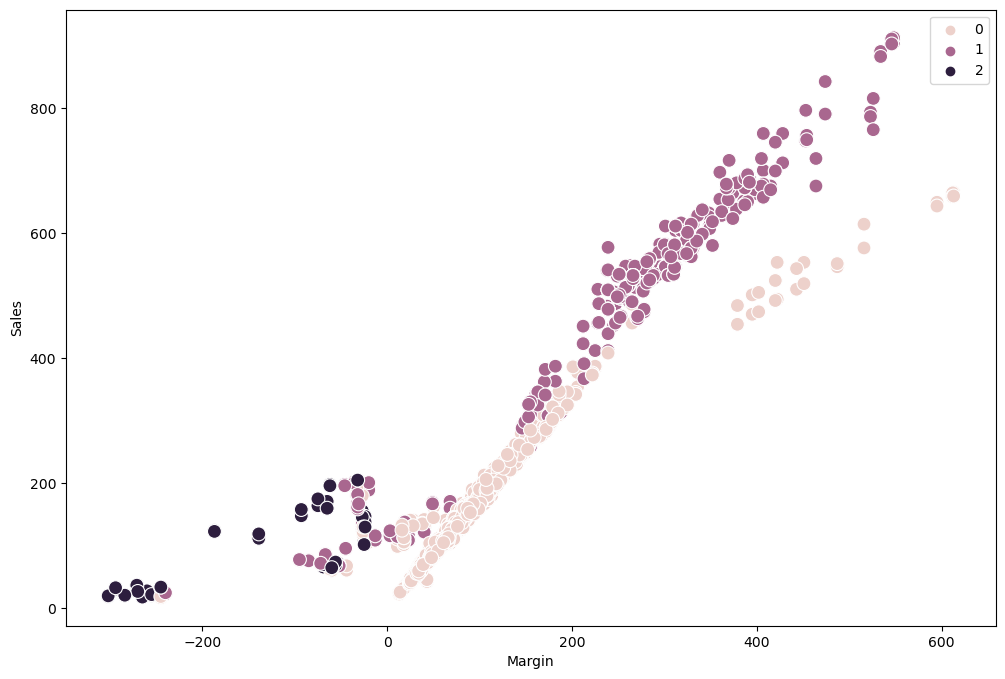

In [24]:
# Plot the clusters for the "Area Code" and "Sales" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Margin'], y = df['Sales'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Margin')
plt.ylabel('Sales')
plt.show()

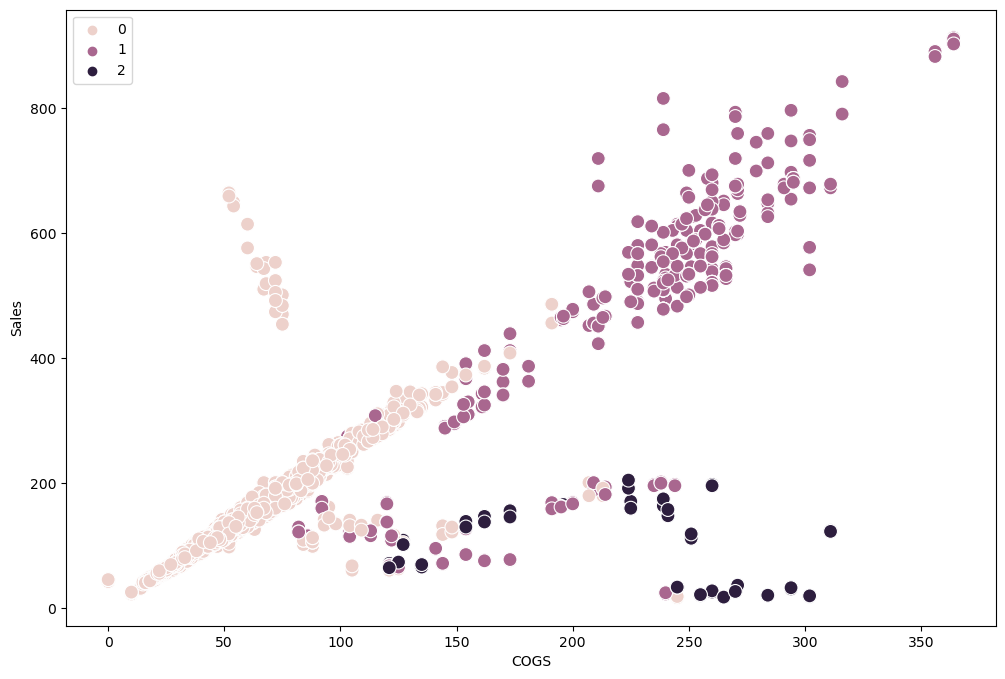

In [25]:
# Plot the clusters for the "Area Code" and "Sales" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['COGS'], y = df['Sales'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('COGS')
plt.ylabel('Sales')
plt.show()

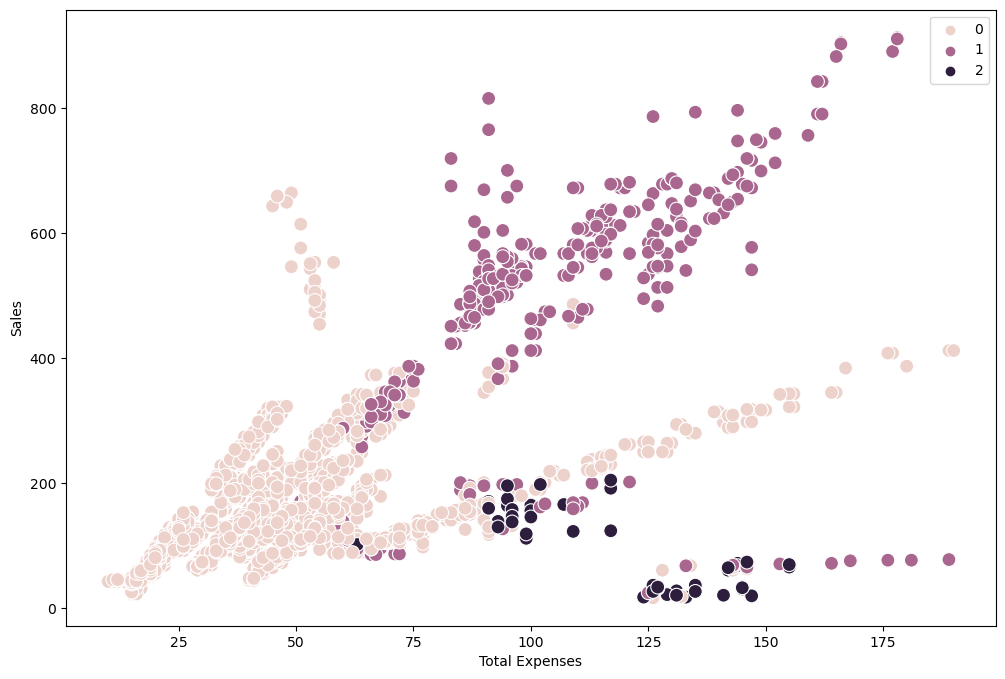

In [28]:
# Plot the clusters for the "Area Code" and "Sales" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Total Expenses'], y = df['Sales'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Total Expenses')
plt.ylabel('Sales')
plt.show()

### Observations

#### For the most part, the purple (cluster 3) cluster has performed the best in all.

#### The plot 'Total Spenses vs Marketing' has divided clusters quite well showing that with higher 'Total Spenses', the 'Marketing' increases as well.

#### The plot 'Profit vs Sales' has divided clusters is medium showing that with higher 'Sales', the 'Profit' increases as well.

#### The dots in other clusters separated to different directions which are not good 


### Grouping

In [33]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [34]:
df.groupby('cluster').agg({'Sales':['mean', 'median'], 
                         'Profit':['mean', 'median'], 
                         'COGS':['mean', 'median'],
                           'Margin':['mean', 'median'],
                           'Total Expenses':['mean', 'median'], 
                          'Marketing':['mean', 'median'],
                          'Inventory':['mean','median']})

Sales             Profit               COGS         \
                   mean median        mean median        mean median   
cluster                                                                
dark purple   93.200000   73.0 -304.620000 -286.0  220.440000  241.0   
pink         149.814835  129.0   48.042624   35.0   61.022142   53.0   
purple       468.153846  510.0  172.984615  191.0  217.396581  238.0   

                 Margin        Total Expenses         Marketing         \
                   mean median           mean median       mean median   
cluster                                                                  
dark purple -138.680000  -75.0     118.260000  125.0  87.360000   96.0   
pink          85.533075   72.0      45.898699   43.0  24.138112   19.0   
purple       240.924786  261.0      99.003419   94.0  69.905983   70.0   

               Inventory          
                    mean  median  
cluster                           
dark purple  4430.640000  3909.0  
pink          569.641572   585.0  
purple       1544.829060  1439.0

#### The k-means clustering model has showed some interesting insights. However, it would be great to include the categorical variables in the analysis. 

In [36]:
#export the clustering result for using in Tableau
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Sale_4clustering.csv'))